In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('---U R own Derectory---/diabetes.csv', encoding= 'cp949')

In [21]:

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df["DiabetesPedigreeFunction"].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: count, Length: 517, dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


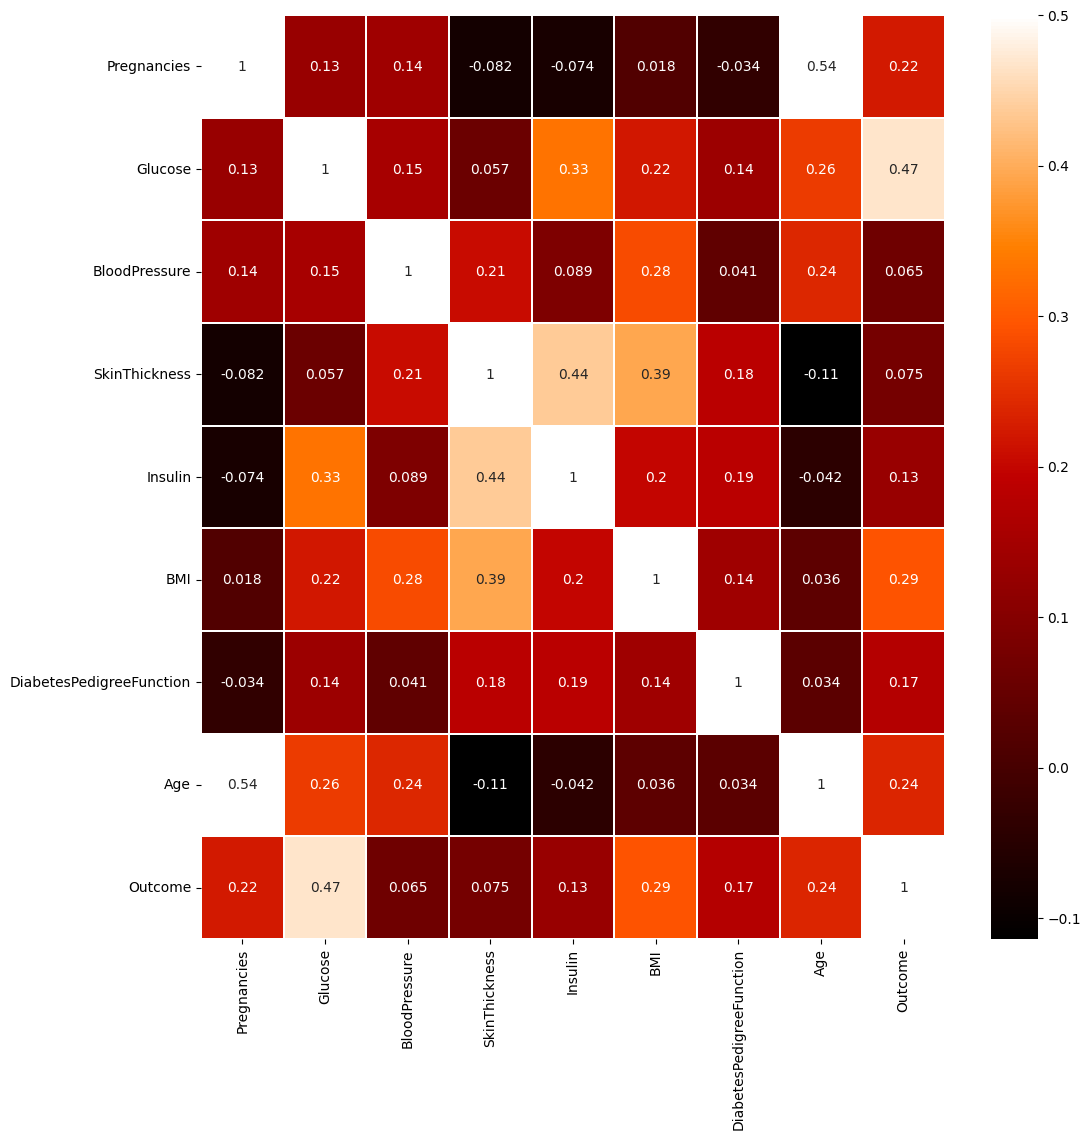

In [ ]:
colormap = plt.cm.gist_heat 
plt.figure(figsize=(12,12)) 

sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

## 4. 중요한 데이터 추출하기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.hist(x=[df.plasma[df.DiabetesPedigreeFunction>=0], df.plasma[df.DiabetesPedigreeFunction>=1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

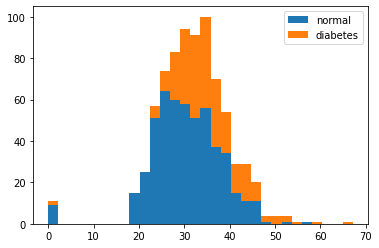

In [ ]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

## 5. 피마 인디언 당뇨병 예측 실행

In [ ]:
X = df.iloc[:,0:8]

y = df.iloc[:,8]

In [1]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 2s 2ms/step - loss: 1.7955 - accuracy: 0.5430
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7971 - accuracy: 0.6432
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6419
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6406
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6523
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6549
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6536
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6589
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6589
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6226 - accura